In [150]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [151]:
df=pd.read_csv(r"C:\Users\user\Downloads\archive(43)\test.txt", sep=';', header=None, names=["text", "label"])

In [152]:
df

,text,label
0,im feeling rather rotten so im not very ambitious right now,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unkind to me and doing me wrong and then all i can think of doing is to get back at them and the people they are close to,anger
1996,im feeling a little cranky negative after this doctors appointment,anger
1997,i feel that i am useful to my people and that gives me a great feeling of achievement,joy
1998,im feeling more comfortable with derby i feel as though i can start to step out my shell,joy


In [153]:
df=df['text']

In [154]:
len(df)

2000

In [155]:
df

0                                                                                                               im feeling rather rotten so im not very ambitious right now
1                                                                                                                                 im updating my blog because i feel shitty
2                                                                         i never make her separate from me because i don t ever want her to feel like i m ashamed with her
3                                                         i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
4                                                                                                                           i was feeling a little vain when i did this one
                                                                                       ...                                                  

In [156]:
pd.set_option("display.max_colwidth", None)
df.head()

0                                                          im feeling rather rotten so im not very ambitious right now
1                                                                            im updating my blog because i feel shitty
2                    i never make her separate from me because i don t ever want her to feel like i m ashamed with her
3    i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
4                                                                      i was feeling a little vain when i did this one
Name: text, dtype: object

import all the necessary packages

In [157]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

download stopwords

In [158]:

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

326
{'where', 'part', 'five', 'bottom', 'we', 'a', 'can', 'namely', 'by', 'that', 'otherwise', 'which', 'more', 'on', 'whereafter', 'keep', 'none', 'another', 'twelve', 'because', 'since', 'fifteen', 'with', 'ten', 'own', 'nothing', 'is', 'some', 'i', 'below', 'anything', 'others', 'amongst', 'done', 'top', 'hence', 'eleven', 'never', 'somewhere', 'may', 'same', 'its', 'four', 'my', 'neither', 'everyone', 'anyhow', 'well', 'above', 'hereafter', 'seem', 'has', 'should', 'them', 'no', "'m", 'over', 'n‘t', 'for', 'whether', 'whenever', 'without', 'through', 'anywhere', 'formerly', 'and', 'everywhere', 'therefore', '‘m', "'ll", 'from', 'if', 'until', 'seems', 'than', 'anyone', 'least', 'whoever', 'any', 'only', 'else', 'your', 'whatever', 'too', 'this', 'again', 'thru', 'give', 'whither', 'per', 'of', 'most', 'nine', 'amount', 'you', 'behind', 'please', 'few', 'many', 'ourselves', 'into', "n't", 'therein', 'much', 'sometimes', 'besides', 'do', 'full', '‘ll', 'eight', 'call', 'whereas', '’r

Data preprocessing. remove the stopwords and punctuation marks

In [159]:

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.add("feel")
STOPWORDS.add("feeling")
STOPWORDS.add("like")
STOPWORDS.add("im")
STOPWORDS.add("just")
STOPWORDS.add("really")
STOPWORDS.add("ive")
STOPWORDS.add("time")
STOPWORDS.add("people")
STOPWORDS.add("little")
STOPWORDS.add("thing")
STOPWORDS.add("think")
STOPWORDS.add("wasnt")
print(STOPWORDS)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS and len(i) > 4])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

{'any', 'where', 'only', 'theirs', 'yourselves', 'feeling', 'm', 'was', 've', 'they', 'as', 'your', 'after', 'in', 'did', 'our', 'we', 'be', "should've", 'now', "doesn't", "mustn't", 'been', 'too', 'ive', 'a', 'this', 'again', 'at', 'not', 'are', 'by', 'can', 'hasn', 'doing', 'that', 'which', 'more', 'on', 'these', 'out', "you're", 'll', "shan't", 'their', 'of', 'up', 'hers', 'myself', 'further', 'most', "won't", "you'll", 'you', 'hadn', 'nor', 'off', 'because', 'with', 'to', 'will', 'the', 'few', 'own', 'ourselves', 'is', 'all', 'into', 'when', 'some', 'i', 'whom', 'during', 'below', "hasn't", 'who', "mightn't", "she's", 'just', 'thing', 'ma', 'like', 'itself', 'needn', 'yours', "you'd", 'while', 'being', 'about', 'it', 'same', 'think', 'having', 'its', 'aren', 'wasnt', 'do', 'each', "shouldn't", 'very', 'my', 'him', 't', "don't", "wasn't", 'down', 'once', 'little', 'his', 'feel', 'above', 'weren', 'those', 'an', 'has', 'should', 'them', 'wouldn', 'no', 'there', 'before', 'won', 'must

In [160]:
document_cleaned

[['rotten', 'ambitious', 'right'],
 ['updating', 'shitty'],
 ['separate', 'ashamed'],
 ['bouquet', 'yellow', 'tulip', 'slightly', 'optimistic', 'arrived'],
 [],
 ['uncomfortable'],
 ['anger', 'telephone'],
 ['explain',
  'clung',
  'relationship',
  'immature',
  'uncommitted',
  'despite',
  'excitement',
  'getting',
  'accepted',
  'master',
  'program',
  'university',
  'virginia'],
 ['breathless', 'reader', 'eager', 'happen'],
 ['grumpy', 'tired', 'menstrual', 'probably', 'walrus', 'vacation', 'summer'],
 ['particularly', 'agitated'],
 ['beautifully',
  'emotional',
  'knowing',
  'woman',
  'handful',
  'holding',
  'journey'],
 ['attention', 'deepens', 'invaded', 'helpless'],
 ['extremely', 'comfortable', 'group'],
 ['position', 'supportive'],
 ['heartbroken', 'katniss'],
 ['mellow', 'today'],
 ['sail', 'pessimism', 'discontent'],
 ['fight', 'wanna', 'publicity', 'world', 'know', 'fight'],
 ['purple', 'perfect'],
 ['sweet', 'nostalgia', 'shared', 'year'],
 ['gotten', 'comment',

In [161]:
df=[]
for i in range(len(document_cleaned)):
    s=' '.join(document_cleaned[i])
    df.append(s)
    

In [162]:
df

['rotten ambitious right',
 'updating shitty',
 'separate ashamed',
 'bouquet yellow tulip slightly optimistic arrived',
 '',
 'uncomfortable',
 'anger telephone',
 'explain clung relationship immature uncommitted despite excitement getting accepted master program university virginia',
 'breathless reader eager happen',
 'grumpy tired menstrual probably walrus vacation summer',
 'particularly agitated',
 'beautifully emotional knowing woman handful holding journey',
 'attention deepens invaded helpless',
 'extremely comfortable group',
 'position supportive',
 'heartbroken katniss',
 'mellow today',
 'sail pessimism discontent',
 'fight wanna publicity world know fight',
 'purple perfect',
 'sweet nostalgia shared year',
 'gotten comment email appreciative space',
 'survey post year pleased vague snippet capture dublin century',
 'hope stigmatized ashamed mental health issue stigma shame',
 'guilty going',
 'fearful absolutely reason',
 'outraged show',
 'stole favorite author rotten p

In [163]:
df = pd.DataFrame(df)

In [164]:
df = df[0]

In [165]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii','ignore').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

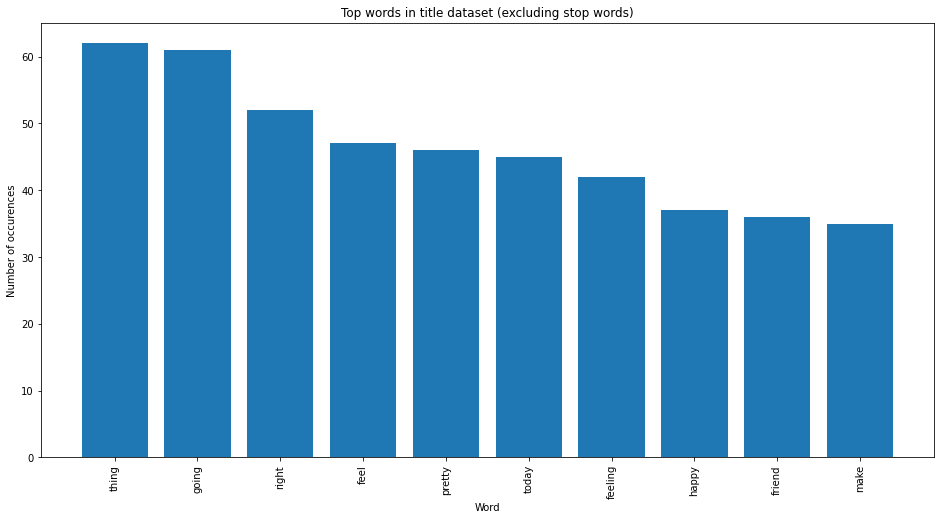

In [166]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [167]:
df.shape[0]

2000

In [168]:
tagged_tweet = [TextBlob(df[i]).pos_tags for i in range(df.shape[0])]

text blob is used to part-of-speech tagging

In [169]:
tagged_tweet_df = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tagged_tweet_df[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  9309
Mean number of words per tweet:  4.6545


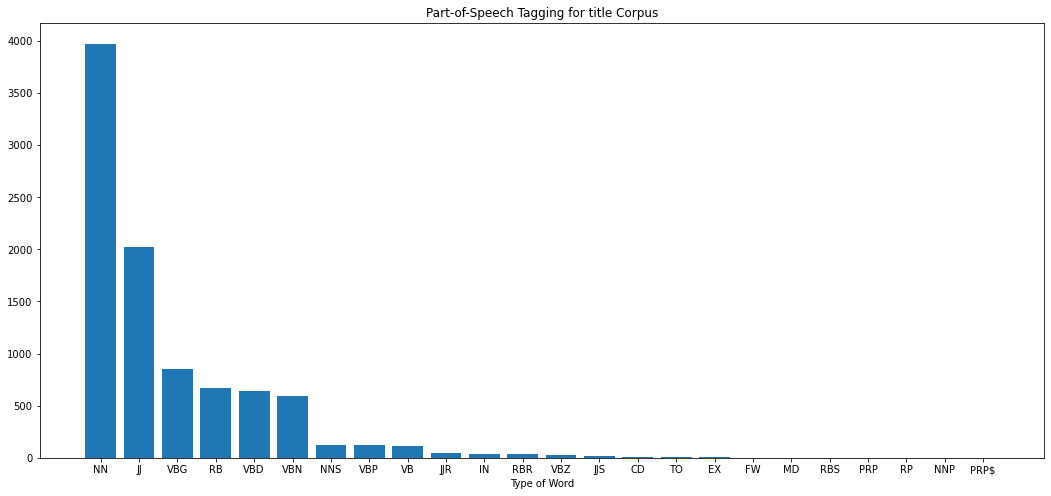

In [170]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [171]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
small_text_sample = df.sample(n=2000, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: surprised weather thankful short kidding
Text after vectorization: 
  (0, 3102)	1
  (0, 3025)	1
  (0, 3382)	1
  (0, 2750)	1
  (0, 1715)	1


6 number of topics are selected as there are 6 type of emotions

In [172]:
n_topics = 6

LSA model

In [173]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [174]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [175]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [176]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [177]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  thing person better night trying friend completely started getting stressed
Topic 2:  going overwhelmed guilty crazy punished intimidated worthwhile idiot superior messy
Topic 3:  right weird morning heart blessed reason frustrated hated question playful
Topic 4:  today make happy didnt proud great useless honoured brave generous
Topic 5:  feeling pretty thought child angry looking point family world loving
Topic 6:  feel place perfect awkward finally fucking beaten tortured hand county


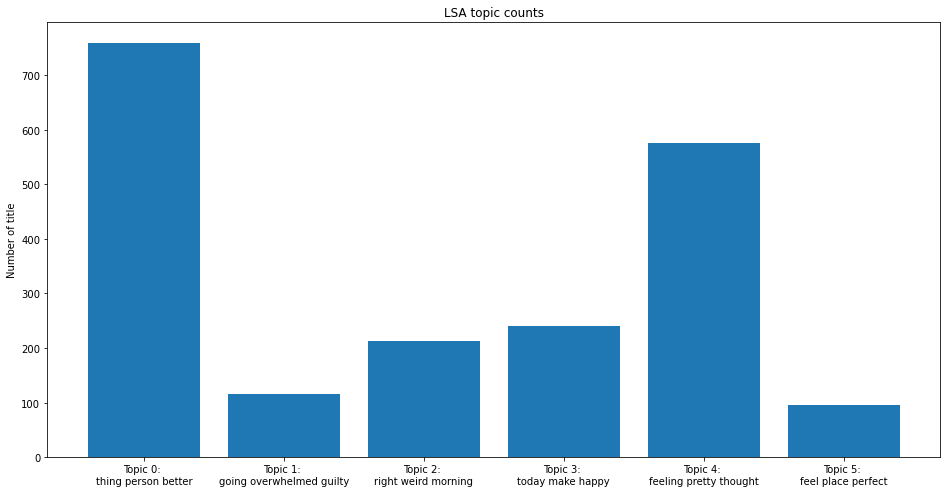

In [178]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [179]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.001696
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.503265
[t-SNE] KL divergence after 2000 iterations: 0.783015


In [180]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [181]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [182]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [183]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [184]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [185]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  happy angry accepted family passionate afraid start thought feel time
Topic 2:  thing make person sweet remember depressed happy gentle proud unwelcome
Topic 3:  going today right better trying place weird blessed completely ashamed
Topic 4:  feeling friend looking hated strange admit embarrassed useless uncomfortable girl
Topic 5:  feel heart anxious world stressed year morning word totally working
Topic 6:  didnt started pretty overwhelmed night peaceful wrong amazing write excited


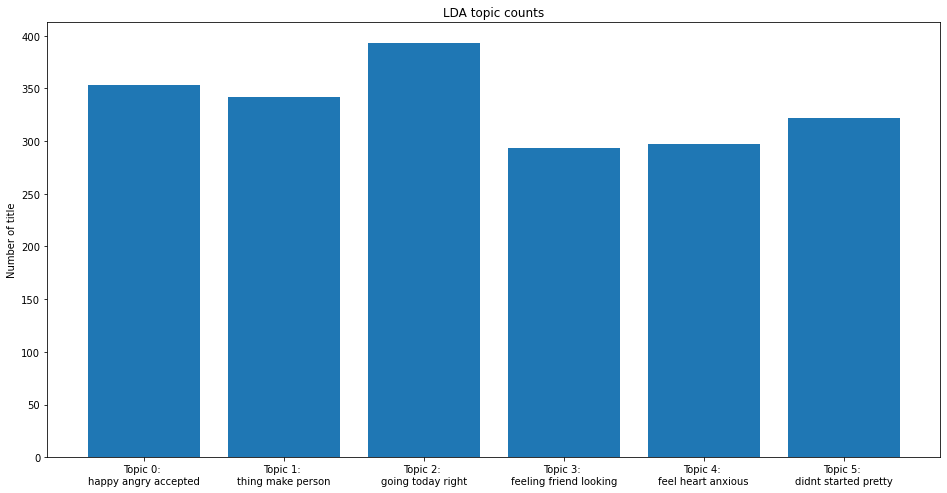

In [186]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [187]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.099s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.070692
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.369625
[t-SNE] KL divergence after 2000 iterations: 0.469856


In [188]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [189]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.006*"thing" + 0.005*"right" + 0.004*"going" + 0.003*"weird" + 0.003*"feel" + 0.003*"uncomfortable" + 0.003*"stressed" + 0.002*"particularly" + 0.002*"perfect" + 0.002*"feeling"'),
 (1,
  '0.005*"make" + 0.005*"pretty" + 0.004*"better" + 0.004*"happy" + 0.004*"going" + 0.004*"thing" + 0.003*"overwhelmed" + 0.003*"excited" + 0.003*"world" + 0.003*"didnt"'),
 (2,
  '0.008*"today" + 0.003*"remember" + 0.003*"getting" + 0.003*"looking" + 0.003*"hated" + 0.002*"pretty" + 0.002*"feel" + 0.002*"didnt" + 0.002*"depressed" + 0.002*"wrong"'),
 (3,
  '0.004*"accepted" + 0.004*"going" + 0.004*"feeling" + 0.003*"word" + 0.003*"thing" + 0.002*"acceptable" + 0.002*"somewhat" + 0.002*"right" + 0.002*"slightly" + 0.002*"getting"'),
 (4,
  '0.004*"friend" + 0.003*"feel" + 0.002*"scared" + 0.002*"start" + 0.002*"wanted" + 0.002*"afraid" + 0.002*"proud" + 0.002*"tortured" + 0.002*"question" + 0.002*"coming"')]

In [190]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.085263,0.072394,0.073998,0.697778,0.070567,3
1,0.587557,0.094276,0.094968,0.091188,0.132010,0
2,0.641290,0.089342,0.089569,0.090150,0.089649,0
3,0.042561,0.042840,0.042288,0.828742,0.043569,3
4,0.200000,0.200000,0.200000,0.200000,0.200000,0


In [191]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -8.502280590367848

Coherence Score using c_v:  0.6778210549611574

Coherence Score using u_mass:  -18.061857458249527


In [192]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [198]:
import warnings
warnings.filterwarnings('ignore')

In [199]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.047322  0.008878       1        1  23.879017
3     -0.006340  0.005223       2        1  20.774139
2     -0.004057 -0.044964       3        1  19.355098
4     -0.018326  0.016659       4        1  18.063077
0     -0.018599  0.014203       5        1  17.928669, topic_info=         Term       Freq      Total Category  logprob  loglift
61      today  18.000000  18.000000  Default  30.0000  30.0000
16   accepted   9.000000   9.000000  Default  29.0000  29.0000
164     thing  24.000000  24.000000  Default  28.0000  28.0000
346    better  12.000000  12.000000  Default  27.0000  27.0000
229      make  15.000000  15.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
191    moment   2.734351   8.233750   Topic5  -6.4132   0.6164
264   feeling   3.567433  17.384947   Topic5  -6.1473   0.1350
215    friend   3.076768  14.676313   Topic5  -6.2952   0.1564
180     happy   2.974309  15.802660   Topic5  -6.3291   0.0486
74      sweet   2.276203   7.327480   Topic5  -6.5966   0.5496

[272 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2978      5  0.369762       abuse
318       2  0.807635  acceptable
16        2  0.802763    accepted
1759      1  0.365378    advanced
1759      4  0.365378    advanced
...     ...       ...         ...
820       2  0.155437       wrong
820       3  0.621750       wrong
235       1  0.186063   yesterday
235       2  0.186063   yesterday
235       3  0.558189   yesterday

[540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 5, 1])

In [200]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [201]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.5386457549779124

Coherence Score for LSI using u_mass:  -16.448746359133736


Compare two models

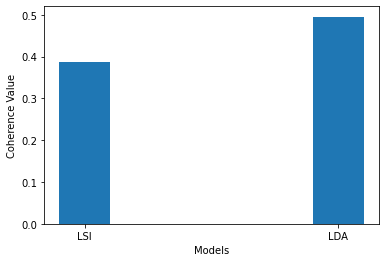

In [202]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])